# Validation tests

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [101]:
# !python3 idsp_parser.py /data/datasets/Projects/PODCAST/country_disease_outbreaks/india/idsp_reporting/

In [102]:
# df = pd.read_csv('IDSP_data.csv')
df = pd.read_csv('idsp_database_v1.1.csv')
df = df.rename(columns={'date_of_start_of_outbreak':'start_date','disease_illness':'disease','num_cases':'cases'})

In [103]:
df.start_date = pd.to_datetime(df.start_date, errors='coerce')
df.cases = pd.to_numeric(df.cases, errors='coerce')
# df.deaths = pd.to_numeric(df.deaths, errors='coerce')

In [104]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'unique_id', 'state', 'district',
       'disease', 'cases', 'num_deaths', 'start_date', 'date_of_reporting',
       'current_status', 'comment_action_taken', 'reported_late',
       'under_surveillance'],
      dtype='object')

In [105]:
df[df.start_date.dt.year == 2011][df.disease=='Cholera']

/users/rsg/anla/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Unnamed: 0.1,unique_id,state,district,disease,cases,num_deaths,start_date,date_of_reporting,current_status,comment_action_taken,reported_late,under_surveillance
11871,11871,3,NaN,NaN,Tirunelveli,Cholera,104.0,NaN,2011-03-03,08.03.11,Under control,Outbreak of diarrhoea reported from Villages P...,True,False
11891,11891,6,NaN,NaN,Gulburga,Cholera,14.0,NaN,2011-08-03,10.03.11,Under control,"Cases reported from Village Haladge, PHC Mayad...",True,False
11926,11926,2,NaN,NaN,NaN,Cholera,28.0,NaN,2011-03-20,21.03.11,Under control,Outbreak reported from Village Doddullarth...,True,False
11997,11997,2,NaN,NaN,Hassan,Cholera,64.0,NaN,2011-07-04,11.04.11,Under control,Cases of diarrhoea and vomiting reported f...,True,False
12027,12027,1,NaN,Karnataka,Mysore,Cholera,21.0,NaN,2011-04-20,21.04.11,Under control,Cases of diarrhoea and vomiting reported ...,True,False
12031,12031,5,NaN,NaN,Thane,Cholera,17.0,NaN,2011-04-18,19.04.11,Under surveillance,Cases with loose watery stool and mild ...,True,False
12047,12047,5,2.,Assam,Barpeta,Cholera,66.0,NaN,2011-04-23,25.04.11,Under surveillance,"Outbreak reported from Villages Puthimari, ...",True,False
12081,12081,1,NaN,12. Tamil Nadu,Tirunelveli,Cholera,13.0,NaN,2011-04-18,25.04.11,Under control,Cases reported from village N. Karaiyirup...,True,False
12084,12084,4,NaN,NaN,Hooghly,Cholera,35.0,NaN,2011-04-24,24.04.11,Under surveillance,Outbreak reported from Easta & Makalpur Sub...,True,False
12091,12091,4,NaN,NaN,NaN,Cholera,208.0,NaN,2011-04-05,05.05.11,Under control,Outbreak of diarrhoea reported from Village...,True,False


In [106]:
df.shape, df.dropna().shape

((18246, 14), (6553, 14))

## validation by number of outbreaks per year

![](https://idsp.nic.in/WriteReadData/p92g8/14905638241465897454.png)

A total of 553 outbreaks were reported in 2008, 799 outbreaks in 2009, 990 outbreaks in 2010, 1675 outbreaks in 2011, 1584 outbreaks in 2012, 1964 outbreaks in 2013, 1562 in 2014 and 1935 in 2015,2679 in 2016 and 1714 have been reported in 2017. Majority of the reported outbreaks included those of Acute Diarrhoeal Diseases, Food Poisoning and Measles. The weekly outbreak report generated by the CSU is shared with all key stakeholders including the Prime Minister’s Office.

In [107]:
year_count_true = dict(zip([a for a in range(2008,2020)],[553,779,990,1675,1584,1964,1562,1935,2679,1714]))

In [108]:
year_count_true

{2008: 553,
 2009: 779,
 2010: 990,
 2011: 1675,
 2012: 1584,
 2013: 1964,
 2014: 1562,
 2015: 1935,
 2016: 2679,
 2017: 1714}

In [109]:
year_count = {}
for year in range(2000,2030):
    year_count[year] = df[df.start_date.dt.year == year].shape[0]

In [110]:
plt.style.use('fivethirtyeight')

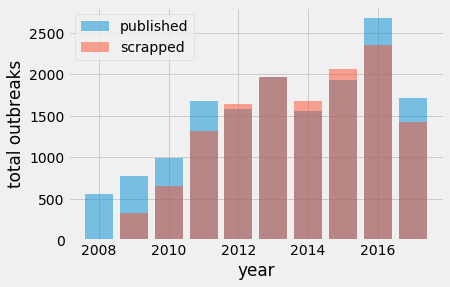

In [111]:
plt.figure()
plt.bar(range(2008,2018),[year_count_true[a] for a in range(2008,2018)],
        alpha=0.5,
        label='published')
plt.bar(range(2008,2018),[year_count[a] for a in range(2008,2018)],
        alpha=0.5,
        label='scrapped')
plt.xlabel('year')
plt.ylabel('total outbreaks')
plt.legend()
plt.show()

We seem to be detecting outbreaks very well. However are they parsed corrrectly? Evidently some dates are wrong, this is due often to inconsistent date formatting and human error.

## State disease year wise data

In [36]:
from tabula import read_pdf

statewise_yearly={}
for pdf in glob('/users/rsg/anla/podcast/country_disease_outbreaks/india/*.pdf'):
    print(pdf)
    statewise_yearly[pdf[-8:-4]] = read_pdf(pdf, lattice=True, pandas_options={'header':0}).fillna(0)

/users/rsg/anla/podcast/country_disease_outbreaks/india/obrk_2011.pdf
/users/rsg/anla/podcast/country_disease_outbreaks/india/obrk_2012.pdf
/users/rsg/anla/podcast/country_disease_outbreaks/india/obrk_2013.pdf
/users/rsg/anla/podcast/country_disease_outbreaks/india/obrk_2014.pdf
/users/rsg/anla/podcast/country_disease_outbreaks/india/obrk_2015.pdf


In [37]:
statewise_yearly['2011'] = statewise_yearly['2011'].rename(columns=dict(zip(statewise_yearly['2011'].columns,'''S.No. 
State
Acute Diarrhoeal Disease
Acute Encephalitis Syndrome
Acute Flaccid Paralysis
Acute Respiratory Illness
Anthrax
Chicken Pox
Chikungunya
Cholera
Crimean-Congo
Hemorrhagic Fever
Dengue
Diphtheria
Dysentery
Enteric Fever
Epidemic Dropsy
Food Poisoning
Gas Poisoning
Kala-Azar
Kyasanur Forest Disease
Leptospirosis
Malaria
Measles
Meningitis
Mumps
Rubella
Scrub Typhus
Sub-cutaneous worm
Viral Fever
Viral Hepatitis
Viral Hepatitis B & C
Vitamin A overdosage
Grand Total'''.split('\n'))))

In [38]:
statewise_yearly['2012'] = statewise_yearly['2012'].rename(columns=dict(zip(statewise_yearly['2012'].columns,
                                                                            '''S.No.
State
Acute Diarrhoeal Disease
Acute Encephalitis Syndrome
Acute Respiratory Infection
Alcohol Poisoning
Anthrax
Chickenpox
Chikungunya
Cholera
Crimean Congo
Hemorrhagic Fever
Dengue
Diphtheria
Enteric Fever
Epidemic Dropsy
Food Poisoning
Hand Foot and Mouth Disease
Influenza A H1N1
Influenza A H3N2
Influenza B
Kala-Azar
KFD
Leptospirosis
Malaria
Measles
Mumps
Mushroom Poisoning
Rubella
Scrub Typhus
Trichinellosis
Viral Exanthemas
(Multiple papulopustular lesions)
Viral Fever
Viral Hepatitis
Viral Hepatitis B
Viral Hepatitis C
Grand Total'''.split('\n'))))

In [39]:
statewise_yearly['2013'] = statewise_yearly['2013'].rename(columns=dict(zip(statewise_yearly['2013'].columns,
                                                                            '''#
State
Acute Diarrhoeal Disease
Acute Encephalitis Syndrome
Alcohol Poisoning
Anthrax
Chickenpox
Chikungunya
Cholera
Crimean-Congo
Haemorrhagic fever
(CCHF)
Dengue
Diphtheria
Drug Side Effects
Enteric Fever
Food Poisoning
Hand Foot and Mouth Disease
Influenza A H1N1
Influenza B
Kala Azar
Leptospirosis
Lyme Disease
Malaria
Measles
Mumps
Mushroom Poisoning
Pertusis
Rubella
Scrub Typhus
Viral Fever
Viral Hepatitis
Viral Hepatitis C
Grand Total'''.split('\n'))))

In [40]:
statewise_yearly['2014'] = statewise_yearly['2014'].rename(columns=dict(zip(statewise_yearly['2014'].columns,
                                                                            '''S.No.
State
Acute Diarrhoeal Disease
Acute Encephalitis Syndrome
Acute Respiratory Infection
Alcohal Poisoning
Anthrax
Brucellosis
Chickenpox
Chikungunya
Cholera
Crimean Congo
Haemorrhagic Fever (CCHF)
Dengue
Diphtheria
Dysentry
Enteric Fever
Food Poisoning
Kyasanur Forest
Disease
Leptospirosis
Malaria
Measles
Mumps
Mushroom
Poisoning
Pertusis
Rubella
Scrub Typhus
Trichinella
Viral encephalitis
(Chandipura)
Viral Fever
Viral Hepatitis
Grand Total'''.split('\n'))))

In [47]:
statewise_yearly['2015'] = statewise_yearly['2015'].rename(columns=dict(zip(statewise_yearly['2015'].columns,
                                                                            '''S.No.
State
Acute Diarrheal Disease
Acute Encephalitis Syndrome
Acute Flaccid Paralysis
Alcohol Poisoning
Anthrax
Castor Seed Poisoning
Chandipura Viral Encephalitis
Chickenpox
Chikungunya
Cholera
Crimean Congo
Haemorrhagic Fever (CCHF)
Dengue
Diphtheria
Dysentery
Enteric Fever
Epidemic Dropsy
Fever with altered sensorium
Fever with Rash
Food Poisoning
Hand Foot Mouth Disease
Influenza A (h1n1)
Influenza B
Jaundice
Kala Azar
KFD
Leptospirosis
Malaria
Measles
Mumps
Mushroom Poisoning
Rubella
Scrub Typhus
Viral Encephalitis
Viral Fever
Viral Hepatitis
Viral Hepatitis C
Grand Total'''.split('\n'))))

In [88]:
statewise_yearly[str(2011)]

,S.No.,State,Acute Diarrhoeal Disease,Acute Encephalitis Syndrome,Acute Flaccid Paralysis,Acute Respiratory Illness,Anthrax,Chicken Pox,Chikungunya,Cholera,...,Measles,Meningitis,Mumps,Rubella,Scrub Typhus,Sub-cutaneous worm,Viral Fever,Viral Hepatitis,Viral Hepatitis B & C,Vitamin A overdosage
0,1,Andaman & Nicobar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Andhra Pradesh,41.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,91.0
2,3,Arunachal Pradesh,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,4,Assam,17.0,12.0,4.0,0.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,97.0
4,5,Bihar,54.0,4.0,5.0,1.0,0.0,11.0,3.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,144.0
5,6,Chandigarh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7,Chhattisgarh,35.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,55.0
7,8,Dadra & Nagar Haveli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,Daman & Diu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,Delhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0


In [89]:
print(statewise_yearly[str(2011)].iloc[-1])
print('------------------------------------------------')
print(df[df.start_date.dt.year == 2011].groupby('disease').count()['Unnamed: 0'])

S.No.                          Grand Total
State                                  532
Acute Diarrhoeal Disease                31
Acute Encephalitis Syndrome             12
Acute Flaccid Paralysis                  2
Acute Respiratory Illness                9
Anthrax                                 70
Chicken Pox                             77
Chikungunya                             58
Cholera                                  2
Crimean-Congo                           57
Hemorrhagic Fever                        5
Dengue                                   9
Diphtheria                              12
Dysentery                                2
Enteric Fever                          305
Epidemic Dropsy                          2
Food Poisoning                           6
Gas Poisoning                            1
Kala-Azar                               14
Kyasanur Forest Disease                 86
Leptospirosis                          177
Malaria                                  2
Measles    

In [48]:
plt.style.use('fivethirtyeight')

In [49]:
df_new = df.dropna()

/users/rsg/anla/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


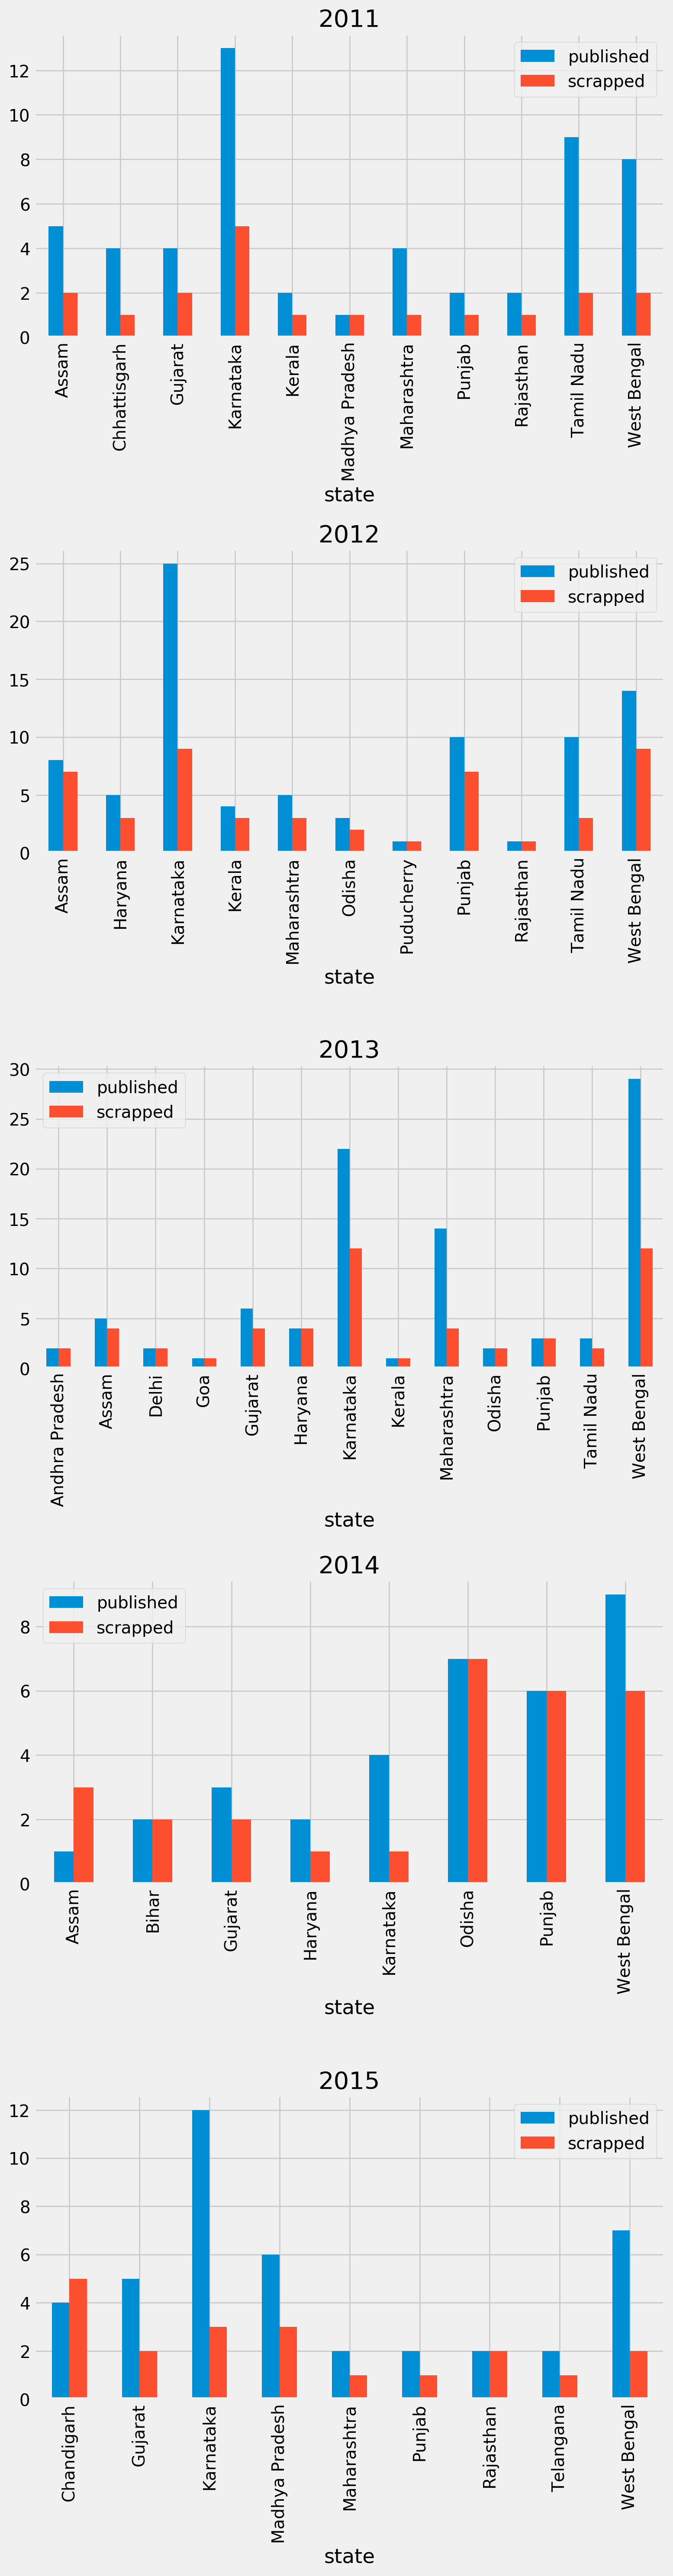

In [70]:
fig, ax = plt.subplots(5, figsize=(8,30), dpi=200)

for i, year in enumerate(range(2011,2016)):
   
    
    # cut down to the relevant data: number of cholera outbreaks per state this year
    scrapped_data = df[['start_date','cases','disease','state']].dropna()[df.start_date.dt.year == year][df.disease == 'Cholera'].groupby('state',as_index=False).count()[['state','cases']]
    published_data = statewise_yearly[str(year)][['State','Cholera']].iloc[:].rename(columns={'State':'state'})
    
    # create dataframe with both scrapped and published data
    df_diff = pd.merge(published_data,scrapped_data, on='state').fillna(method='ffill').rename(columns={'Cholera':'published','cases':'scrapped'})
    
    # plot results
    df_diff.plot.bar(x='state',title=str(year), ax=ax[i])

plt.tight_layout()
plt.show()

From this analysis it seems like the scrapped data is surprisingly low quality. The need to obtain the original excel / csv files is high, I cannot scrape this much better.

To inspect this we can look at a bad year and check the raw column to see if the wrong location or disease has been picked up.

The error lies with parsing the location of outbreaks. Damian and Diau are everywhere between the word and matches with so many raw strings. Often the overlapping records result in locations or diseases pulled from neighbouring records. A better way of dealing with pre 2016 outbreak records is desparately needed. 

On the positive side, the location of dates and cases deaths are actually quite robust and work well. But the disease and location are fucked up.